In [1]:
import sys
import os, os.path

sys.path.append(os.path.join(os.getcwd() ,'/modules'))
root_path = "C:/git/Springboard-Public/Capstone Project 2/"
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    root_path = "/content/drive/My Drive/Capstone Project 2/"

print('Current Working Dir: ', os.getcwd())
print('Root Path: ', root_path)

# We need to set the working directory since we are using relative paths from various locations
if os.getcwd() != root_path:
  os.chdir(root_path)

In [2]:
from modules.lib.StandardTraining import *
from modules.models.ResNet import ResNet_GrayScale_12_Out

from torchsummary import summary

# os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

%matplotlib inline

In [3]:
force_cpu = True
device = torch.device('cuda' if ~force_cpu and torch.cuda.is_available() else 'cpu')
# Assume that we are on a CUDA machine, then this should print a CUDA device:
print(f'Working on device={device}')

Working on device=cuda


In [4]:
net = ResNet_GrayScale_12_Out(layers=18, drop_out_precent=0.5) #18, 34, 50, 101, 152

net = nn.DataParallel(net)
net.to(device)


summary(net, (1, 320, 320))   

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 160, 160]           3,136
       BatchNorm2d-2         [-1, 64, 160, 160]             128
              ReLU-3         [-1, 64, 160, 160]               0
         MaxPool2d-4           [-1, 64, 80, 80]               0
            Conv2d-5           [-1, 64, 80, 80]          36,864
       BatchNorm2d-6           [-1, 64, 80, 80]             128
              ReLU-7           [-1, 64, 80, 80]               0
            Conv2d-8           [-1, 64, 80, 80]          36,864
       BatchNorm2d-9           [-1, 64, 80, 80]             128
             ReLU-10           [-1, 64, 80, 80]               0
       BasicBlock-11           [-1, 64, 80, 80]               0
           Conv2d-12           [-1, 64, 80, 80]          36,864
      BatchNorm2d-13           [-1, 64, 80, 80]             128
             ReLU-14           [-1, 64,

In [5]:
standardTraining = StandardTraining(number_images=0, 
                                     batch_size=32, 
                                     learning_rate=1e-4, 
                                     num_epochs=20,
                                     device=device, 
                                     net=net,
                                     use_positivity_weights=True)

Number of Training Images: 105,243
Number of Validation Images: 26,505


Positivity Weights used in BCEWithLogitsLoss:


Enlarged_Cardiomediastinum    18.413946
Cardiomegaly                   7.852132
Lung_Opacity                   1.202750
Lung_Lesion                   22.724752
Edema                          3.312177
Consolidation                 15.547642
Pneumonia                     36.413082
Atelectasis                    5.369870
Pneumothorax                  11.509569
Pleural_Effusion               1.948809
Pleural_Other                 74.119914
Fracture                      22.145590
dtype: float64

In [6]:
standardTraining.train()

▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [1/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 978.8669         
Time of Completion: 2020-07-21 16:45:08.328446          
Training Time: 0:16:51.316451          
Validation Time: 0:02:40.863026

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11889,0.103036,0.576199,0.174813,0.776468,0.340626
4,Edema,24406,0.242113,0.550904,0.336388,0.765875,0.468974
5,Consolidation,6360,0.000314,0.095238,0.000627,0.645581,0.092094
7,Atelectasis,16522,0.001089,0.200000,0.002167,0.602946,0.203879
9,Pleural_Effusion,35690,0.535920,0.655573,0.589739,0.799806,0.656318



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2956,0.148173,0.693038,0.244147,0.818463,0.444802
4,Edema,6093,0.373379,0.554472,0.446253,0.795281,0.511894
5,Consolidation,1563,0.000000,0.000000,0.000000,0.678666,0.104646
7,Atelectasis,4096,0.000000,0.000000,0.000000,0.648639,0.234281
9,Pleural_Effusion,9044,0.456546,0.773221,0.574110,0.840900,0.726805


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [2/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 930.8370         
Time of Completion: 2020-07-21 17:02:48.327425          
Training Time: 0:15:19.828659          
Validation Time: 0:02:19.249802

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11889,0.202540,0.606855,0.303714,0.830809,0.439931
4,Edema,24406,0.309473,0.582299,0.404152,0.798020,0.515367
5,Consolidation,6360,0.000000,0.000000,0.000000,0.680801,0.109317
7,Atelectasis,16522,0.000242,0.235294,0.000484,0.640410,0.231190
9,Pleural_Effusion,35690,0.626366,0.701003,0.661586,0.844315,0.726323



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2956,0.177943,0.697613,0.283558,0.849409,0.490632
4,Edema,6093,0.407189,0.576039,0.477115,0.809682,0.534840
5,Consolidation,1563,0.000000,0.000000,0.000000,0.700760,0.121504
7,Atelectasis,4096,0.000000,0.000000,0.000000,0.661337,0.246950
9,Pleural_Effusion,9044,0.725674,0.660527,0.691570,0.849357,0.734484


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [3/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 911.8615         
Time of Completion: 2020-07-21 17:20:14.247822          
Training Time: 0:15:06.706500          
Validation Time: 0:02:18.302332

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11889,0.245689,0.628037,0.353204,0.843862,0.471099
4,Edema,24406,0.347005,0.600766,0.439914,0.809922,0.537274
5,Consolidation,6360,0.000000,0.000000,0.000000,0.697378,0.117327
7,Atelectasis,16522,0.000847,0.333333,0.001690,0.654100,0.240007
9,Pleural_Effusion,35690,0.646708,0.713456,0.678444,0.856668,0.746211



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2956,0.219892,0.666667,0.330705,0.851537,0.494919
4,Edema,6093,0.351551,0.606971,0.445230,0.818456,0.549669
5,Consolidation,1563,0.000000,0.000000,0.000000,0.714804,0.128582
7,Atelectasis,4096,0.000000,0.000000,0.000000,0.670814,0.249839
9,Pleural_Effusion,9044,0.643631,0.729997,0.684099,0.862992,0.759993


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [4/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 898.4253         
Time of Completion: 2020-07-21 17:37:40.682637          
Training Time: 0:15:07.110238          
Validation Time: 0:02:18.426998

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11889,0.264530,0.634200,0.373338,0.851948,0.488686
4,Edema,24406,0.365730,0.606798,0.456386,0.816868,0.547863
5,Consolidation,6360,0.000472,0.500000,0.000943,0.709284,0.128195
7,Atelectasis,16522,0.001332,0.423077,0.002655,0.665912,0.248645
9,Pleural_Effusion,35690,0.661922,0.720178,0.689822,0.864193,0.758392



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2956,0.181664,0.734610,0.291294,0.854979,0.510225
4,Edema,6093,0.505662,0.557950,0.530521,0.820734,0.557650
5,Consolidation,1563,0.000000,0.000000,0.000000,0.714529,0.130151
7,Atelectasis,4096,0.000977,0.666667,0.001950,0.678076,0.259065
9,Pleural_Effusion,9044,0.734962,0.691963,0.712815,0.868199,0.770041


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [5/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 885.8757         
Time of Completion: 2020-07-21 17:55:08.218510          
Training Time: 0:15:07.371540          
Validation Time: 0:02:19.263762

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11889,0.289680,0.656000,0.401890,0.859007,0.507140
4,Edema,24406,0.385069,0.613286,0.473093,0.823759,0.563927
5,Consolidation,6360,0.000629,0.307692,0.001255,0.722461,0.140770
7,Atelectasis,16522,0.002179,0.391304,0.004334,0.673970,0.260128
9,Pleural_Effusion,35690,0.672793,0.725307,0.698064,0.870252,0.767809



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2956,0.362991,0.594460,0.450746,0.853785,0.503517
4,Edema,6093,0.408337,0.585825,0.481238,0.818854,0.553410
5,Consolidation,1563,0.000000,0.000000,0.000000,0.722762,0.135643
7,Atelectasis,4096,0.000000,0.000000,0.000000,0.682381,0.264321
9,Pleural_Effusion,9044,0.688965,0.718188,0.703273,0.868036,0.768753


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [6/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 872.9496         
Time of Completion: 2020-07-21 18:12:38.647625          
Training Time: 0:15:10.361579          
Validation Time: 0:02:19.151008

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11889,0.306838,0.655761,0.418061,0.867932,0.527278
4,Edema,24406,0.403425,0.625659,0.490546,0.831143,0.579138
5,Consolidation,6360,0.000943,0.400000,0.001882,0.728312,0.144262
7,Atelectasis,16522,0.003874,0.426667,0.007678,0.683611,0.268429
9,Pleural_Effusion,35690,0.682348,0.731981,0.706294,0.876070,0.779365



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2956,0.359269,0.595291,0.448101,0.848742,0.499238
4,Edema,6093,0.486952,0.562464,0.521992,0.818107,0.552507
5,Consolidation,1563,0.000000,0.000000,0.000000,0.720133,0.134431
7,Atelectasis,4096,0.000000,0.000000,0.000000,0.680426,0.262813
9,Pleural_Effusion,9044,0.720257,0.705131,0.712613,0.868654,0.767409


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [7/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 855.9004         
Time of Completion: 2020-07-21 18:30:10.854036          
Training Time: 0:15:11.182353          
Validation Time: 0:02:20.120472

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11889,0.337118,0.669674,0.448473,0.875415,0.548153
4,Edema,24406,0.431574,0.633640,0.513442,0.840719,0.598372
5,Consolidation,6360,0.002516,0.363636,0.004997,0.740855,0.157747
7,Atelectasis,16522,0.008897,0.448171,0.017448,0.696624,0.282645
9,Pleural_Effusion,35690,0.695937,0.740151,0.717364,0.882562,0.788871



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2956,0.299053,0.625177,0.404577,0.855716,0.501403
4,Edema,6093,0.348433,0.622216,0.446712,0.821483,0.558353
5,Consolidation,1563,0.039028,0.248980,0.067478,0.717423,0.135502
7,Atelectasis,4096,0.003418,0.500000,0.006790,0.681762,0.265171
9,Pleural_Effusion,9044,0.462959,0.809708,0.589096,0.869585,0.769263


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [8/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 834.3604         
Time of Completion: 2020-07-21 18:47:51.465962          
Training Time: 0:15:19.238769          
Validation Time: 0:02:20.459573

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11889,0.374716,0.686018,0.484687,0.887017,0.579848
4,Edema,24406,0.459887,0.649650,0.538541,0.850923,0.621806
5,Consolidation,6360,0.004717,0.410959,0.009327,0.753227,0.169275
7,Atelectasis,16522,0.019489,0.541176,0.037623,0.709707,0.302455
9,Pleural_Effusion,35690,0.707705,0.745712,0.726212,0.889957,0.801641



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2956,0.218200,0.669087,0.329082,0.848924,0.486891
4,Edema,6093,0.425899,0.587104,0.493674,0.817168,0.554361
5,Consolidation,1563,0.001919,0.214286,0.003805,0.720372,0.132873
7,Atelectasis,4096,0.030273,0.366864,0.055931,0.679185,0.261009
9,Pleural_Effusion,9044,0.754644,0.685861,0.718610,0.867198,0.767371


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [9/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 806.0288         
Time of Completion: 2020-07-21 19:05:21.916038          
Training Time: 0:15:10.315670          
Validation Time: 0:02:19.228856

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11889,0.409706,0.701267,0.517229,0.899531,0.611507
4,Edema,24406,0.502008,0.672485,0.574874,0.865380,0.655136
5,Consolidation,6360,0.011321,0.537313,0.022174,0.771902,0.195555
7,Atelectasis,16522,0.043034,0.532584,0.079633,0.730744,0.328908
9,Pleural_Effusion,35690,0.720930,0.759087,0.739517,0.898096,0.818256



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2956,0.238160,0.623561,0.344676,0.839813,0.473572
4,Edema,6093,0.336944,0.599416,0.431393,0.813329,0.542169
5,Consolidation,1563,0.005758,0.346154,0.011328,0.717666,0.135685
7,Atelectasis,4096,0.005127,0.420000,0.010130,0.663167,0.245620
9,Pleural_Effusion,9044,0.633238,0.742898,0.683698,0.869399,0.770919


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [10/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 768.6970         
Time of Completion: 2020-07-21 19:22:52.181613          
Training Time: 0:15:10.382514          
Validation Time: 0:02:18.977504

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11889,0.467070,0.724840,0.568082,0.915744,0.663543
4,Edema,24406,0.540154,0.695233,0.607960,0.879557,0.690948
5,Consolidation,6360,0.028931,0.567901,0.055057,0.791642,0.229089
7,Atelectasis,16522,0.084796,0.595917,0.148466,0.754156,0.372090
9,Pleural_Effusion,35690,0.737770,0.773054,0.755000,0.908217,0.835803



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2956,0.305480,0.547605,0.392182,0.828768,0.447563
4,Edema,6093,0.323322,0.594448,0.418837,0.809528,0.537061
5,Consolidation,1563,0.015355,0.303797,0.029233,0.691511,0.126419
7,Atelectasis,4096,0.155029,0.291017,0.202294,0.659366,0.243591
9,Pleural_Effusion,9044,0.734520,0.673118,0.702480,0.856472,0.750234


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [11/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 722.6582         
Time of Completion: 2020-07-21 19:40:23.658950          
Training Time: 0:15:11.280120          
Validation Time: 0:02:19.289665

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11889,0.534864,0.759646,0.627739,0.929955,0.715895
4,Edema,24406,0.590060,0.721638,0.649249,0.896012,0.732552
5,Consolidation,6360,0.052830,0.577320,0.096802,0.817275,0.267778
7,Atelectasis,16522,0.153734,0.617254,0.246160,0.783229,0.426629
9,Pleural_Effusion,35690,0.762398,0.790506,0.776198,0.920800,0.858095



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2956,0.489851,0.455776,0.472200,0.828650,0.456510
4,Edema,6093,0.517643,0.524967,0.521279,0.802520,0.523405
5,Consolidation,1563,0.033269,0.265306,0.059125,0.695207,0.124776
7,Atelectasis,4096,0.007568,0.333333,0.014801,0.650505,0.233410
9,Pleural_Effusion,9044,0.726559,0.667785,0.695933,0.854675,0.742829


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [12/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 671.6645         
Time of Completion: 2020-07-21 19:57:54.488018          
Training Time: 0:15:10.801350          
Validation Time: 0:02:19.114131

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11889,0.591303,0.782328,0.673533,0.941810,0.760193
4,Edema,24406,0.638982,0.752982,0.691314,0.914158,0.777457
5,Consolidation,6360,0.103931,0.626540,0.178287,0.842423,0.333822
7,Atelectasis,16522,0.234717,0.649472,0.344818,0.813497,0.490426
9,Pleural_Effusion,35690,0.782488,0.806672,0.794396,0.931457,0.877093



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2956,0.379905,0.482388,0.425057,0.821787,0.431946
4,Edema,6093,0.400131,0.549718,0.463146,0.792627,0.515288
5,Consolidation,1563,0.015995,0.211864,0.029744,0.681470,0.116348
7,Atelectasis,4096,0.090088,0.295436,0.138073,0.639286,0.229341
9,Pleural_Effusion,9044,0.571650,0.718155,0.636582,0.841492,0.728474


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [13/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 617.9629         
Time of Completion: 2020-07-21 20:15:22.808770          
Training Time: 0:15:08.414716          
Validation Time: 0:02:18.989448

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11889,0.647405,0.814756,0.721504,0.953627,0.807695
4,Edema,24406,0.680898,0.777341,0.725930,0.928060,0.814316
5,Consolidation,6360,0.170126,0.657351,0.270297,0.871658,0.404804
7,Atelectasis,16522,0.318848,0.680796,0.434295,0.842262,0.559252
9,Pleural_Effusion,35690,0.808266,0.828699,0.818355,0.942870,0.898626



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2956,0.281123,0.525617,0.366321,0.799870,0.407159
4,Edema,6093,0.792713,0.384615,0.517935,0.780399,0.498891
5,Consolidation,1563,0.005758,0.321429,0.011314,0.655256,0.109543
7,Atelectasis,4096,0.140381,0.251421,0.180166,0.613799,0.212529
9,Pleural_Effusion,9044,0.659885,0.655176,0.657522,0.830045,0.712497


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [14/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 566.2554         
Time of Completion: 2020-07-21 20:32:51.661147          
Training Time: 0:15:08.820673          
Validation Time: 0:02:19.108151

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11889,0.691984,0.827333,0.753630,0.961733,0.835975
4,Edema,24406,0.717651,0.798823,0.756065,0.940152,0.846271
5,Consolidation,6360,0.264465,0.714225,0.386001,0.894882,0.489010
7,Atelectasis,16522,0.409333,0.719315,0.521756,0.871076,0.632755
9,Pleural_Effusion,35690,0.827347,0.846487,0.836807,0.952911,0.916034



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2956,0.205345,0.618756,0.308357,0.810786,0.417711
4,Edema,6093,0.600525,0.450338,0.514700,0.777189,0.490986
5,Consolidation,1563,0.058221,0.200000,0.090188,0.665149,0.107146
7,Atelectasis,4096,0.272217,0.233312,0.251268,0.628351,0.215326
9,Pleural_Effusion,9044,0.679345,0.667101,0.673168,0.838415,0.724838


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [15/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 516.6061         
Time of Completion: 2020-07-21 20:50:20.518491          
Training Time: 0:15:08.927381          
Validation Time: 0:02:19.008428

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11889,0.724788,0.850390,0.782581,0.969067,0.865632
4,Edema,24406,0.744448,0.819753,0.780288,0.949743,0.871568
5,Consolidation,6360,0.359591,0.753790,0.486907,0.916928,0.582616
7,Atelectasis,16522,0.490074,0.751880,0.593382,0.896173,0.697782
9,Pleural_Effusion,35690,0.845979,0.861033,0.853440,0.960411,0.930499



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2956,0.489175,0.375780,0.425044,0.796502,0.397263
4,Edema,6093,0.467422,0.486921,0.476972,0.764486,0.476962
5,Consolidation,1563,0.030070,0.180077,0.051535,0.642651,0.098988
7,Atelectasis,4096,0.161377,0.248496,0.195678,0.624517,0.216151
9,Pleural_Effusion,9044,0.818775,0.560772,0.665648,0.823514,0.699442


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [16/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 474.4100         
Time of Completion: 2020-07-21 21:07:49.139457          
Training Time: 0:15:08.650084          
Validation Time: 0:02:19.048338

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11889,0.747077,0.860576,0.799820,0.971593,0.879506
4,Edema,24406,0.775178,0.835534,0.804225,0.958681,0.893665
5,Consolidation,6360,0.449528,0.789561,0.572888,0.931789,0.654080
7,Atelectasis,16522,0.561312,0.785533,0.654759,0.915664,0.751186
9,Pleural_Effusion,35690,0.860689,0.875107,0.867838,0.966959,0.941100



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2956,0.277402,0.525304,0.363073,0.799255,0.402151
4,Edema,6093,0.440505,0.488444,0.463238,0.761577,0.473102
5,Consolidation,1563,0.046065,0.182741,0.073582,0.643074,0.101969
7,Atelectasis,4096,0.151367,0.240310,0.185740,0.614470,0.210517
9,Pleural_Effusion,9044,0.801526,0.595841,0.683545,0.833917,0.709507


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [17/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 438.7752         
Time of Completion: 2020-07-21 21:25:17.959895          
Training Time: 0:15:08.800710          
Validation Time: 0:02:19.098182

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11889,0.763563,0.869374,0.813040,0.975927,0.893908
4,Edema,24406,0.792920,0.849741,0.820348,0.963593,0.906723
5,Consolidation,6360,0.513994,0.811166,0.629259,0.944101,0.707457
7,Atelectasis,16522,0.610822,0.808524,0.695904,0.931055,0.795162
9,Pleural_Effusion,35690,0.871224,0.882525,0.876838,0.970840,0.949660



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2956,0.227334,0.565657,0.324324,0.803491,0.406525
4,Edema,6093,0.192024,0.598160,0.290719,0.773092,0.488159
5,Consolidation,1563,0.108765,0.151921,0.126771,0.665774,0.110242
7,Atelectasis,4096,0.180176,0.240078,0.205858,0.608958,0.210518
9,Pleural_Effusion,9044,0.649934,0.645721,0.647821,0.814322,0.688438


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [18/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 409.0497         
Time of Completion: 2020-07-21 21:42:47.258034          
Training Time: 0:15:09.283428          
Validation Time: 0:02:19.080230

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11889,0.781142,0.882291,0.828642,0.978122,0.903775
4,Edema,24406,0.806072,0.861528,0.832878,0.967737,0.917843
5,Consolidation,6360,0.565409,0.831830,0.673219,0.953056,0.749091
7,Atelectasis,16522,0.647319,0.828556,0.726809,0.940541,0.822188
9,Pleural_Effusion,35690,0.881171,0.892499,0.886799,0.974278,0.955241



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2956,0.354533,0.446527,0.395248,0.794327,0.389725
4,Edema,6093,0.433612,0.502472,0.465510,0.771809,0.484914
5,Consolidation,1563,0.204095,0.126738,0.156373,0.648696,0.106776
7,Atelectasis,4096,0.051025,0.240230,0.084172,0.599560,0.205223
9,Pleural_Effusion,9044,0.723463,0.622076,0.668950,0.824962,0.700441


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [19/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 388.0299         
Time of Completion: 2020-07-21 22:00:16.684875          
Training Time: 0:15:09.222592          
Validation Time: 0:02:19.277725

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11889,0.787198,0.889723,0.835327,0.979079,0.909852
4,Edema,24406,0.813038,0.867985,0.839613,0.970652,0.925181
5,Consolidation,6360,0.605660,0.853723,0.708609,0.958388,0.782711
7,Atelectasis,16522,0.673768,0.842631,0.748798,0.946940,0.842231
9,Pleural_Effusion,35690,0.887812,0.898894,0.893318,0.977068,0.959692



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2956,0.351488,0.475080,0.404044,0.805052,0.408073
4,Edema,6093,0.574594,0.454203,0.507355,0.769357,0.478660
5,Consolidation,1563,0.039667,0.162730,0.063786,0.646467,0.100639
7,Atelectasis,4096,0.149902,0.234262,0.182820,0.605764,0.206831
9,Pleural_Effusion,9044,0.529965,0.705060,0.605100,0.823883,0.696391


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [20/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 367.9622         
Time of Completion: 2020-07-21 22:17:56.019121          
Training Time: 0:15:11.986401          
Validation Time: 0:02:26.423316

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11889,0.793843,0.893919,0.840914,0.980479,0.915956
4,Edema,24406,0.820987,0.873795,0.846568,0.972720,0.931024
5,Consolidation,6360,0.635220,0.866395,0.733013,0.961467,0.802338
7,Atelectasis,16522,0.689747,0.855427,0.763705,0.952460,0.857009
9,Pleural_Effusion,35690,0.890810,0.899378,0.895073,0.978663,0.962708



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2956,0.391746,0.436158,0.412761,0.799646,0.407452
4,Edema,6093,0.303135,0.549375,0.390693,0.768383,0.481994
5,Consolidation,1563,0.107486,0.159091,0.128293,0.662752,0.108731
7,Atelectasis,4096,0.323486,0.214436,0.257908,0.606814,0.206413
9,Pleural_Effusion,9044,0.497567,0.734814,0.593354,0.836481,0.720501



TRAINING

▔▔▔▔▔


,Score for all Targets
Accuracy Score,0.659426
Hamming Loss,0.041575
Combined Recall,0.642642
Combined Precision,0.668449
Combined F1,0.642297


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
0,Enlarged_Cardiomediastinum,5421,0.670725,0.893147,0.766119,0.966233,0.825157
1,Cardiomegaly,11889,0.793843,0.893919,0.840914,0.980479,0.915956
2,Lung_Opacity,47778,0.858533,0.862215,0.860370,0.950378,0.943514
3,Lung_Lesion,4436,0.653066,0.885933,0.751882,0.969119,0.810671
4,Edema,24406,0.820987,0.873795,0.846568,0.972720,0.931024
5,Consolidation,6360,0.635220,0.866395,0.733013,0.961467,0.802338
6,Pneumonia,2813,0.525062,0.854251,0.650374,0.958020,0.706330
7,Atelectasis,16522,0.689747,0.855427,0.763705,0.952460,0.857009
8,Pneumothorax,8413,0.767740,0.900084,0.828661,0.979367,0.897581
9,Pleural_Effusion,35690,0.890810,0.899378,0.895073,0.978663,0.962708


***** ROC *****


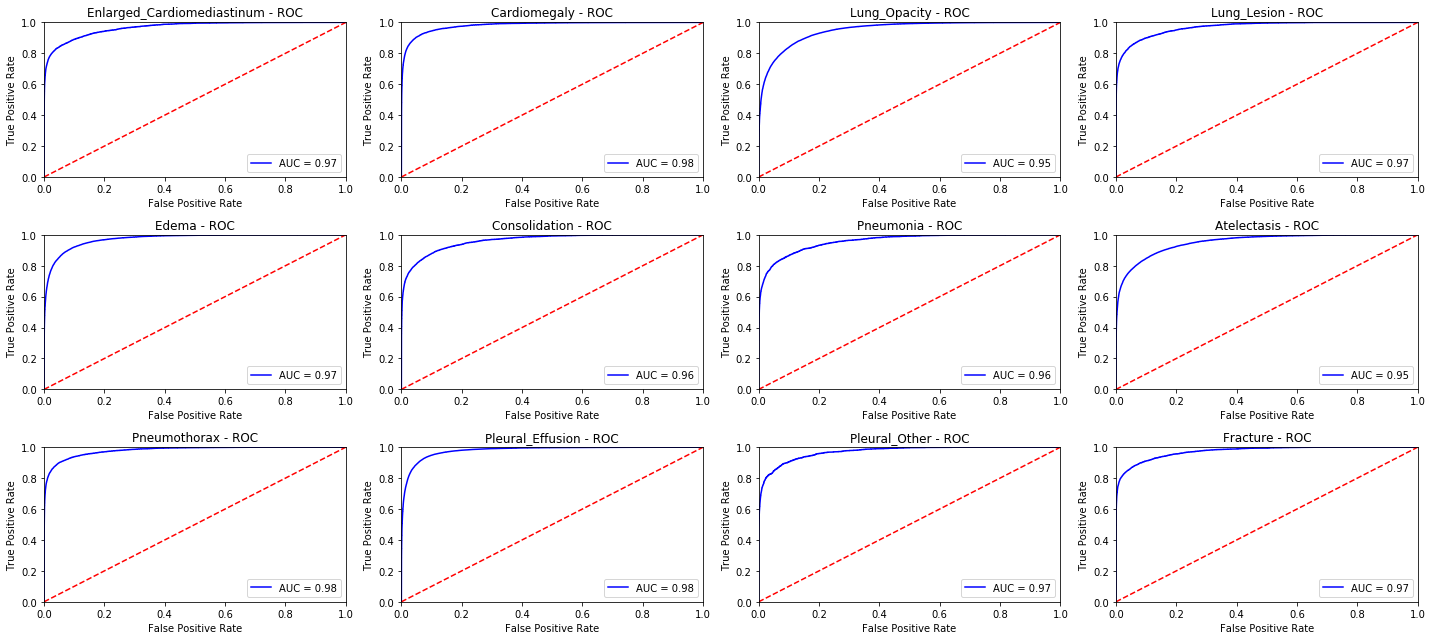

***** Precision / Recall *****


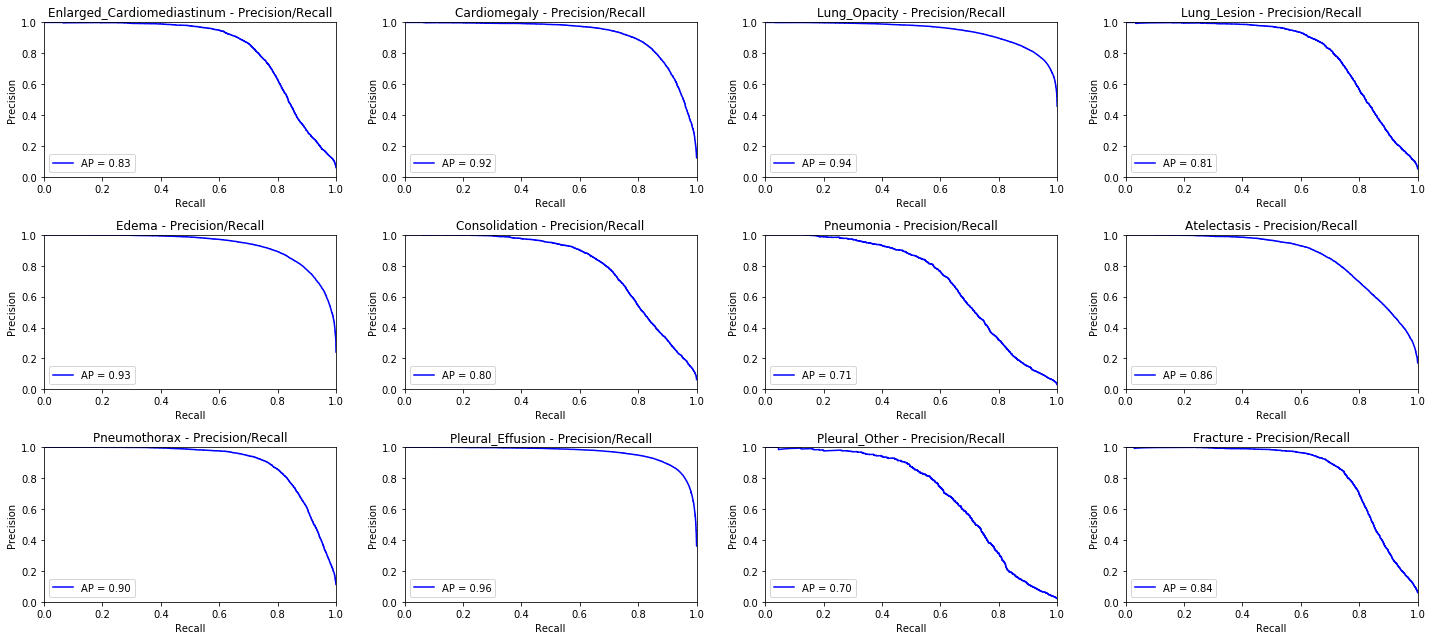


VALIDATION

▔▔▔▔▔▔▔


,Score for all Targets
Accuracy Score,0.175665
Hamming Loss,0.142360
Combined Recall,0.304488
Combined Precision,0.339909
Combined F1,0.297209


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
0,Enlarged_Cardiomediastinum,1367,0.103877,0.150106,0.122784,0.612818,0.095245
1,Cardiomegaly,2956,0.391746,0.436158,0.412761,0.799646,0.407452
2,Lung_Opacity,12088,0.505046,0.589684,0.544093,0.659570,0.584900
3,Lung_Lesion,1106,0.103978,0.111434,0.107577,0.659267,0.084395
4,Edema,6093,0.303135,0.549375,0.390693,0.768383,0.481994
5,Consolidation,1563,0.107486,0.159091,0.128293,0.662752,0.108731
6,Pneumonia,698,0.020057,0.186667,0.036223,0.636508,0.055039
7,Atelectasis,4096,0.323486,0.214436,0.257908,0.606814,0.206413
8,Pneumothorax,2195,0.376765,0.305956,0.337689,0.766673,0.280153
9,Pleural_Effusion,9044,0.497567,0.734814,0.593354,0.836481,0.720501


***** ROC *****


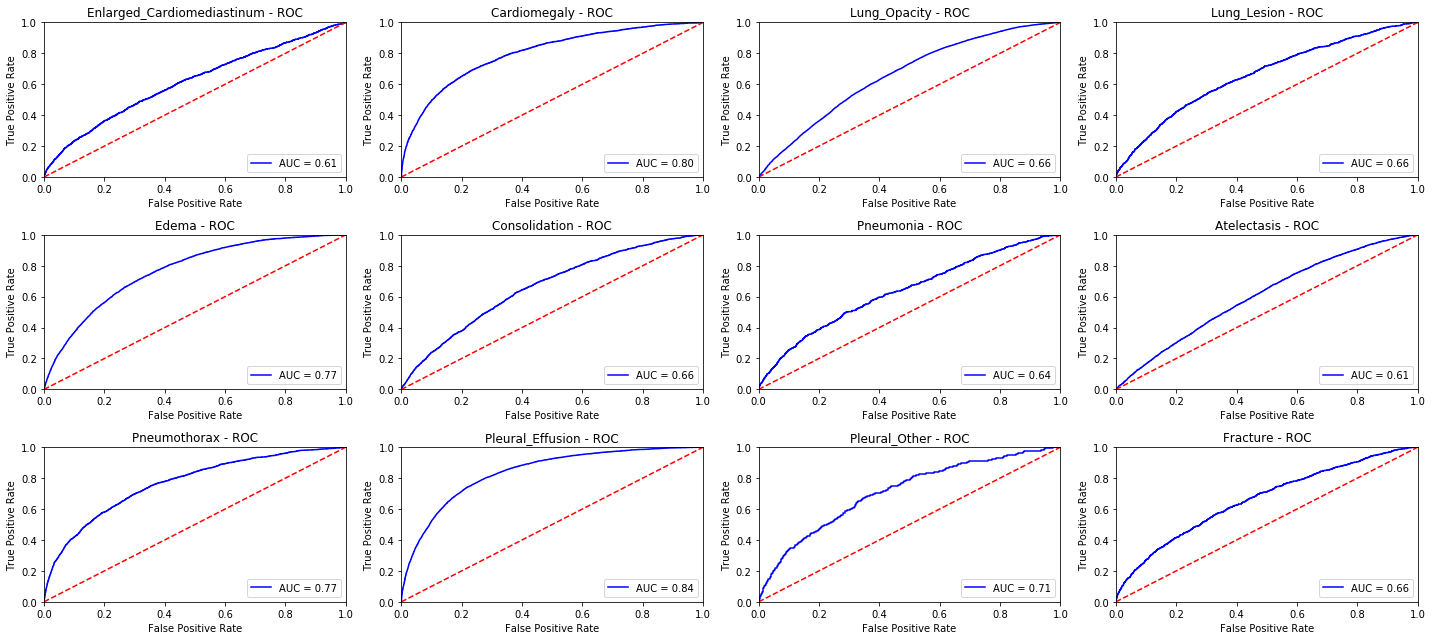

***** Precision / Recall *****


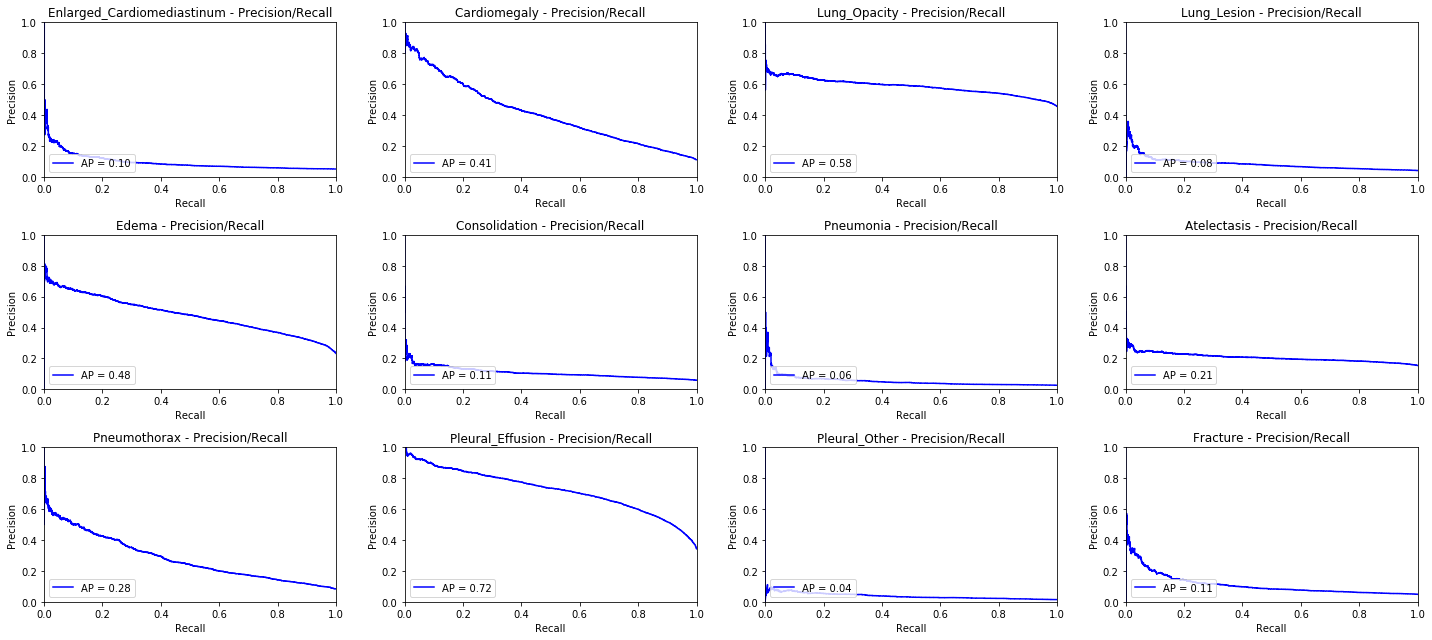

In [7]:
standardTraining.displayMetrics()